In [255]:
import json

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, TwoSlopeNorm, CenteredNorm
import seaborn as sns
plt.rcParams['svg.fonttype'] = 'none'
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = ['Tahoma']
plt.style.use('seaborn-white')  # 'seaborn-ticks'
sns.set_style('white')

from sklearn.preprocessing import StandardScaler

In [2]:
# colors and class-superclass maps
with open(r'..\data\metadata\color_schemes.json') as infile:
    colors = json.load(infile)

animals_used = [1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101]
diabetic =     [1076, 1082, 1101]
impaired =     [1060, 1062, 1074, 1092, 1102]
normal =       [1091, 1093]
animal_tol = {
    1076: 'diabetic', 1082: 'diabetic', 1101: 'diabetic', 1060: 'impaired', 1062: 'impaired', 
    1074: 'impaired', 1092: 'impaired', 1102: 'impaired', 1091: 'normal', 1093: 'normal'}
ap = pd.read_excel(r'..\data\metadata\animal_phenotypes.xlsx', index_col=0)

fg = pd.read_csv(r'..\data\metadata\combined_metab_lipid_file_grouping.csv', index_col=0)
fg = pd.read_csv(r'..\data\metadata\combined_metab_lipid_file_grouping.csv', index_col=0)

# Use data that was sent to collaborators 
# data = pd.read_excel(r'../data/processed/combined_metabolites_data.xlsx').set_index('i')
data = pd.read_csv(r'../data/processed/combined_metabolites_data_with_model_params.csv').set_index('i')
data_cols = data.filter(regex='_FBG|_RBG').columns
fbg_cols = data.filter(regex='_FBG').columns
rbg_cols = data.filter(regex='_RBG').columns

In [345]:
data.loc[data['Type'] == 'metabolite', 'ID'].unique()

array(['unknown', 'Urocanic acid', 'Uridine', 'Uric acid', 'Tyrosine',
       'Tryptophan', 'Trigonelline', 'Indole-3-acrylic acid', 'Threonine',
       'Threonic acid', 'Taurine', 'Stachydrine', 'Serine', 'Ribose',
       'Quinic acid', 'Pyroglutamic acid', 'Pseudouridine', 'Proline',
       'Pipecolic acid', 'Phenylalanine', 'Phenylacetylglycine',
       'Pentose sugar', 'Ornithine', 'Nicotinamide 1-oxide',
       'Nicotinamide', 'N6,N6,N6-Trimethyl-L-lysine',
       'N3,N4-Dimethyl-L-arginine', 'N-Methyl-2-pyrrolidone',
       'N-Isovalerylglycine', 'N-Acetylornithine',
       'N-Acetylneuraminic acid', 'N-Acetyl-L-aspartic acid',
       'Methylhistidine', 'Methylaminopyrimidine', 'Leucine',
       'Lactic Acid', 'Isoleucine', 'Hydroxycinnamic acid',
       'Hydrocinnamic acid', 'Histidine', 'Hippuric acid', 'Iditol',
       'Hexose sugar', 'Guanidinosuccinic acid', 'Glyceric acid',
       'Glutamine', 'Glutamic acid', 'Glucose', 'Gluconic acid',
       'Ethyl-beta-D-glucuronide', '

In [275]:
def parse_lipid(lipid):
    l = lipid.split(' ')
    cls = l[0]
    fa = l[1]
    
    if '-' in fa:
        fa = fa.split('-')[1]
        label = fa.split('-')[0] + '-'
    else:
        label = ''
    if 'd' in fa:
        fa = fa.split('d')[1]
        label = fa.split('d')[0] + 'd'
    else:
        label = ''
        
    fa = [x.split(':') for x in fa.split('_')]
    fa = [[int(x) for x in sublist] for sublist in fa]
    carbons = sum([chain[0] for chain in fa])
    unsat = sum([chain[1] for chain in fa])
    sum_comp = str(carbons) + ':' + str(unsat)
    result = cls + ' ' + label + str(carbons) + ':' + str(unsat)
#     print(lipid, result)
    return cls, label, carbons, unsat, sum_comp, fa

def bin_p_value(pval):
#     if   pval < 0.0001:
#         return '****'
#     if pval < 0.001:
#         return '***'
    if pval < 0.01:
        return '**'
    if pval < 0.05:
        return '*'
#     if pval < 0.05:
#         return 'p < 0.05'
    return 'ns'

In [361]:
# d = data[data_cols]
ids = data.loc[(data['Type'] == 'lipid') & (data['ID'] != 'unknown')].copy()
ids['fa_carbons'] = ids.loc[:, 'ID'].apply(lambda x: parse_lipid(x)[2])
ids['fa_unsat'] = ids.loc[:, 'ID'].apply(lambda x: parse_lipid(x)[3])
ids['fa_carbon:unsat'] = ids.loc[:, 'ID'].apply(lambda x: parse_lipid(x)[4])
ids['log2 FC'] = ids[rbg_cols].mean(axis=1) - ids[fbg_cols].mean(axis=1)
ids['-log10_pval_interaction'] = -np.log10(ids['qval_sampling:ogtt'])
ids['-log10_pval_ogtt']  = -np.log10(ids['qval_ogtt'])
ids['-log10_pval_sampling'] = -np.log10(ids['qval_sampling'])
ids['pval_asterisks'] = ids['qval_sampling:ogtt'].apply(lambda x: bin_p_value(x))
ids

,unique_id,RT,m/z,adduct,Type,polarity,ID,1102_8_RBG,1093_9_RBG,1060_8_FBG,...,model_param_ogtt,model_param_sampling[T.RBG]:ogtt,fa_carbons,fa_unsat,fa_carbon:unsat,log2 FC,-log10_pval_interaction,-log10_pval_ogtt,-log10_pval_sampling,pval_asterisks
i,,,,,,,,,,,,,,,,,,,,,
l_5,LysoPC 20:5_1.036_542.32452,1.036,542.32452,NaN,lipid,+,LysoPC 20:5,25.647760,26.973065,23.835084,...,-2.317200e-05,1.078265e-05,20,5,20:5,0.592306,0.293023,1.755738,2.961821,ns
l_6,LysoPC 16:0_1.095_496.33994,1.095,496.33994,NaN,lipid,+,LysoPC 16:0,26.922772,28.708609,26.253075,...,-1.764579e-06,-8.596802e-06,16,0,16:0,0.160012,0.137507,0.194770,0.244461,ns
l_7,LysoPC 18:1_1.137_522.35236,1.137,522.35236,NaN,lipid,+,LysoPC 18:1,23.033801,23.842277,21.278809,...,-1.961566e-05,6.780118e-06,18,1,18:1,1.225050,0.120907,0.996083,6.093187,ns
l_9,LysoPC 22:6_1.289_568.33972,1.289,568.33972,NaN,lipid,+,LysoPC 22:6,24.169049,25.812168,25.394377,...,-5.625473e-06,-4.526247e-06,22,6,22:6,-0.175092,0.125434,0.640544,0.596280,ns
l_10,LysoPC 15:0_1.324_482.32388,1.324,482.32388,NaN,lipid,+,LysoPC 15:0,20.923253,22.214125,20.671309,...,-1.266481e-05,-6.780389e-07,15,0,15:0,0.359271,0.014234,1.378177,1.732673,ns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
l_861,TG 57:2_19.582_946.88043,19.582,946.88043,NaN,lipid,+,TG 57:2,19.849247,19.422779,20.153422,...,-9.476374e-06,6.182588e-05,57,2,57:2,0.454954,1.484842,0.862429,0.741361,*
l_863,TG 56:1_19.841_934.88123,19.841,934.88123,NaN,lipid,+,TG 56:1,21.470210,20.888517,20.975758,...,-1.760424e-05,7.800309e-05,56,1,56:1,1.211975,2.356075,1.002770,3.963748,**
l_864,TG 18:2_18:1_24:0_19.865_986.91193,19.865,986.91193,NaN,lipid,+,TG 18:2_18:1_24:0,20.600064,19.856448,19.408564,...,-1.306094e-05,7.646786e-05,60,3,60:3,1.565687,2.194161,1.231176,5.578809,**


In [270]:
# Because some lipid IDs overlap in their sum compositions, add some non-random jitter to the x and y values

for cls in ids['molec_class'].unique():
    print(cls, '\n')
    display(ids.loc[ids['molec_class'] == cls, 'fa_carbon:unsat'].value_counts())
    
def add_jitter(lipid_class, os): 
    # os = offset for jitter
    tgdf = ids.loc[ids['molec_class'] == lipid_class].copy()
    overlaps = tgdf['fa_carbon:unsat'].value_counts() > 1
    overlaps = overlaps.loc[overlaps == True].index
    for overlap in overlaps: 
        df = tgdf.loc[tgdf['fa_carbon:unsat'] == overlap]
        if len(df) == 4:
            for carbon_offset, unsat_offset, (i, row) in zip([-os,os,os,os], [os,-os,os,-os], df.iterrows()):
                tgdf.loc[i, 'fa_carbons'] = tgdf.loc[i, 'fa_carbons'] + carbon_offset
                tgdf.loc[i, 'fa_unsat'] = tgdf.loc[i, 'fa_unsat'] + unsat_offset
        if len(df) == 3:
            for carbon_offset, unsat_offset, (i, row) in zip([0, -os, os], [os, -os, -os], df.iterrows()):
                tgdf.loc[i, 'fa_carbons'] = tgdf.loc[i, 'fa_carbons'] + carbon_offset
                tgdf.loc[i, 'fa_unsat'] = tgdf.loc[i, 'fa_unsat'] + unsat_offset
        if len(df) == 2:
            for carbon_offset, unsat_offset, (i, row) in zip([-os, os], [0, 0], df.iterrows()):
                tgdf.loc[i, 'fa_carbons'] = tgdf.loc[i, 'fa_carbons'] + carbon_offset
                tgdf.loc[i, 'fa_unsat'] = tgdf.loc[i, 'fa_unsat'] + unsat_offset
    return tgdf
tgdf = add_jitter('TG', 0.15)
pcdf = add_jitter('PC', 0.1)

LysoPC 



16:0    3
18:1    3
17:0    2
18:0    2
20:5    1
22:6    1
15:0    1
20:4    1
18:2    1
22:5    1
17:1    1
20:3    1
22:4    1
20:2    1
Name: fa_carbon:unsat, dtype: int64

LysoPE 



18:2    1
16:0    1
18:0    1
Name: fa_carbon:unsat, dtype: int64

AC 



16:0    1
18:1    1
18:0    1
Name: fa_carbon:unsat, dtype: int64

PC 



38:7     4
36:3     4
38:5     3
36:4     3
34:3     2
38:6     2
40:5     2
40:6     2
39:4     2
38:4     2
36:5     2
32:2     1
37:3     1
42:6     1
32:0     1
36:6     1
34:1     1
36:2     1
38:3     1
33:0     1
35:1     1
40:4     1
37:2     1
34:0     1
36:1     1
38:2     1
40:3     1
35:2     1
42:10    1
37:6     1
33:1     1
37:4     1
31:0     1
40:8     1
34:2     1
39:6     1
32:1     1
34:4     1
30:0     1
37:5     1
35:3     1
40:7     1
33:2     1
35:4     1
35:0     1
Name: fa_carbon:unsat, dtype: int64

Alkenyl-DG 



36:5    1
38:6    1
Name: fa_carbon:unsat, dtype: int64

PI 



38:3    2
36:4    1
34:2    1
36:3    1
38:5    1
37:4    1
35:2    1
40:6    1
34:1    1
38:4    1
36:2    1
40:4    1
36:1    1
38:2    1
Name: fa_carbon:unsat, dtype: int64

SM 



40:2    2
41:2    2
40:7    1
42:1    1
41:1    1
43:2    1
40:1    1
42:2    1
39:1    1
42:3    1
38:1    1
32:1    1
37:1    1
36:0    1
36:1    1
35:1    1
36:2    1
34:1    1
33:1    1
36:3    1
34:2    1
43:1    1
Name: fa_carbon:unsat, dtype: int64

Plasmenyl-PC 



38:6    2
34:4    1
36:5    1
40:7    1
32:1    1
36:3    1
40:6    1
38:4    1
34:2    1
36:2    1
34:0    1
Name: fa_carbon:unsat, dtype: int64

Plasmanyl-PC 



38:5    3
36:5    2
38:6    2
36:3    2
34:3    2
34:4    1
34:1    1
36:1    1
40:4    1
42:6    1
40:5    1
36:2    1
38:3    1
32:1    1
32:0    1
38:4    1
40:6    1
34:2    1
36:4    1
33:2    1
38:2    1
Name: fa_carbon:unsat, dtype: int64

Plasmenyl-PE 



40:7    2
38:5    2
36:5    1
38:6    1
36:4    1
36:3    1
34:2    1
40:6    1
38:4    1
34:1    1
36:2    1
40:5    1
42:6    1
40:4    1
36:1    1
38:2    1
Name: fa_carbon:unsat, dtype: int64

PE 



36:4    1
34:2    1
40:6    1
38:4    1
36:2    1
36:1    1
Name: fa_carbon:unsat, dtype: int64

Plasmanyl-PE 



36:4    1
38:5    1
40:6    1
38:4    1
36:2    1
40:5    1
42:6    1
40:4    1
36:1    1
38:2    1
Name: fa_carbon:unsat, dtype: int64

Cer[NS] 



42:2    1
40:1    1
41:1    1
42:1    1
Name: fa_carbon:unsat, dtype: int64

TG 



58:9     3
54:4     3
58:11    3
58:7     3
52:5     2
        ..
48:1     1
46:0     1
52:3     1
49:1     1
54:0     1
Name: fa_carbon:unsat, Length: 81, dtype: int64

CE 



20:5    1
20:4    1
18:2    1
18:1    1
Name: fa_carbon:unsat, dtype: int64

Text(0.5, 1.0, 'Triacylglycerol (TG)\nn=107')

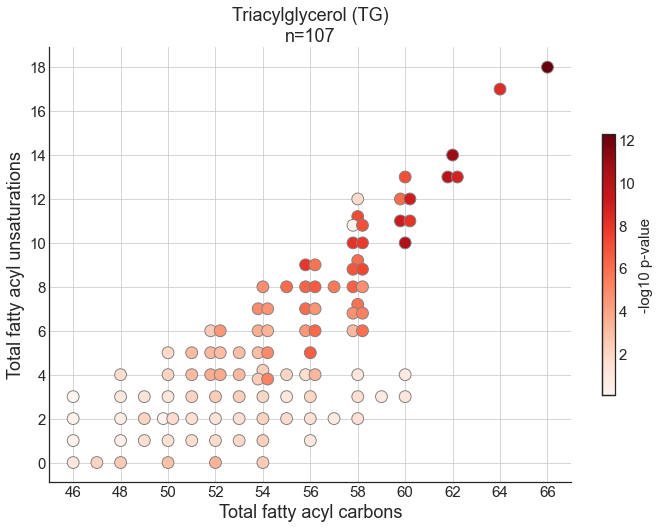

In [351]:
def make_carbon_unsat_plot_pval(lipid_class, jitter_offset, pval):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11, 8))
    df = add_jitter(lipid_class, os=jitter_offset)
    max_C, min_C = df['fa_carbons'].max(), df['fa_carbons'].min()
    max_unsat, min_unsat = df['fa_unsat'].max(), df['fa_unsat'].min()
#     norm = CenteredNorm(vcenter=0.0, )
    norm = Normalize(vmin=df[pval].min(), vmax=df[pval].max())
    cmap = 'Reds'  # GnBu  viridis_r
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    
    sns.scatterplot(
        data=df, x='fa_carbons', y='fa_unsat',
    #         size='-log10 p-value', sizes=(10, 200),
    #         size='pval_asterisks', sizes={'ns': 20, '*': 55, '**': 75, '***': 110, '****': 120},
        s=140,
#         style='pval_asterisks', markers={'ns': '^','*':'o', '**': '*'}, sizes={'ns': 100, '*': 100, '**':500},
        hue=pval, 
        hue_norm=norm, 
        palette=cmap,  
#         legend=('brief' if i == 0 else False),
        legend=False,
        edgecolor='gray', ax=ax)
    ax.set_xticks(np.arange(min_C, max_C+1, 2))
    ax.set_xticklabels([int(x) for x in np.arange(min_C, max_C+1, 2)], fontsize=15)
    ax.set_yticks(np.arange(min_unsat, max_unsat+1, 2))
    ax.set_yticklabels([int(x) for x in np.arange(min_unsat, max_unsat+1, 2)], fontsize=15)
    plt.grid(color='#CCCCCC')
#     plt.legend(title='log2 fold change', loc=(1.01, 0.5), markerscale=1.5, fontsize=15, title_fontsize=18)
#     plt.title('Lipids by class significant under glucose tolerance', fontsize=18)
    plt.ylabel('Total fatty acyl unsaturations', fontsize=18)
    plt.xlabel('Total fatty acyl carbons', fontsize=18)
    cb = ax.figure.colorbar(sm, shrink=0.6, fraction=0.1)
    cb.ax.tick_params(labelsize=15)
    cb.set_label(label='-log10 p-value', fontsize=15)
    # plt.tight_layout()
    sns.despine()
    # plt.savefig(r'..\reports\figures\4-5-4\TG_.png', bbox_inches='tight')
make_carbon_unsat_plot_pval('TG', 0.20, '-log10_pval_ogtt')

num_tg = ids.loc[ids['molec_class'] == 'TG'].shape[0]
plt.title(f'Triacylglycerol (TG)\nn={num_tg}', fontsize=18)
# plt.savefig(r'..\reports\figures\4-5-4\TG_pval_interaction.png', dpi=150, bbox_inches='tight')
# plt.savefig(r'..\reports\figures\4-5-4\TG_pval_interaction.svg', dpi=150, bbox_inches='tight')

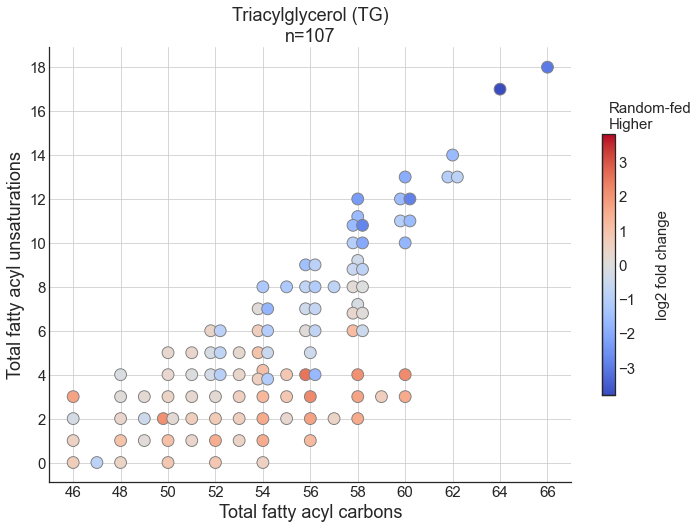

In [368]:
def make_carbon_unsat_plot(lipid_class, jitter_offset):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11, 8))
    df = add_jitter(lipid_class, os=jitter_offset)
    max_C, min_C = df['fa_carbons'].max(), df['fa_carbons'].min()
    max_unsat, min_unsat = df['fa_unsat'].max(), df['fa_unsat'].min()
    norm = CenteredNorm(vcenter=0.0,)  #  vmin=df['log2 FC'].min(), vmax=df['log2 FC'].max()
    cmap = 'coolwarm'  # GnBu  viridis_r
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    
    sns.scatterplot(
        data=df, x='fa_carbons', y='fa_unsat',
    #         size='-log10 p-value', sizes=(10, 200),
    #         size='pval_asterisks', sizes={'ns': 20, '*': 55, '**': 75, '***': 110, '****': 120},
        s=140,
#             style='pval_asterisks', markers={'ns': '^','*':'o'},
        hue='log2 FC', hue_norm=norm, palette=cmap,  
#         legend=('brief' if i == 0 else False),
        legend=False,
        edgecolor='gray', ax=ax)
    ax.set_xticks(np.arange(min_C, max_C+1, 2))
    ax.set_xticklabels([int(x) for x in np.arange(min_C, max_C+1, 2)], fontsize=15)
    ax.set_yticks(np.arange(min_unsat, max_unsat+1, 2))
    ax.set_yticklabels([int(x) for x in np.arange(min_unsat, max_unsat+1, 2)], fontsize=15)
    plt.grid(color='#CCCCCC')
#     plt.legend(title='log2 fold change', loc=(1.01, 0.5), markerscale=1.5, fontsize=15, title_fontsize=18)
#     plt.title('Lipids by class significant under glucose tolerance', fontsize=18)
    plt.ylabel('Total fatty acyl unsaturations', fontsize=18)
    plt.xlabel('Total fatty acyl carbons', fontsize=18)
    cb = ax.figure.colorbar(sm, shrink=0.6, fraction=0.1)
    cb.ax.tick_params(labelsize=15)
    cb.set_label(label='\nlog2 fold change', fontsize=15)
    cb.ax.set_title('Random-fed\nHigher', fontsize=15, ha='left')
#     plt.text()
#     cb.ax.set_xticks(ticks=[0], labels=['Fasted\nHigher'], fontsize=20)
#     cb.ax.set_xticklabels(ticks=[0], labels=['Fasted\nHigher'], fontsize=20)
    # plt.tight_layout()
    sns.despine()
    
make_carbon_unsat_plot('TG', 0.20)
num_tg = ids.loc[ids['molec_class'] == 'TG'].shape[0]
plt.title(f'Triacylglycerol (TG)\nn={num_tg}', fontsize=18)
plt.savefig(r'..\reports\figures\4-5-4\TG_log2fc.png', dpi=150, bbox_inches='tight')
plt.savefig(r'..\reports\figures\4-5-4\TG_log2fc.svg', dpi=150, bbox_inches='tight')

In [321]:
ids.loc[ids['molec_class'] == 'TG'].shape[0]

107

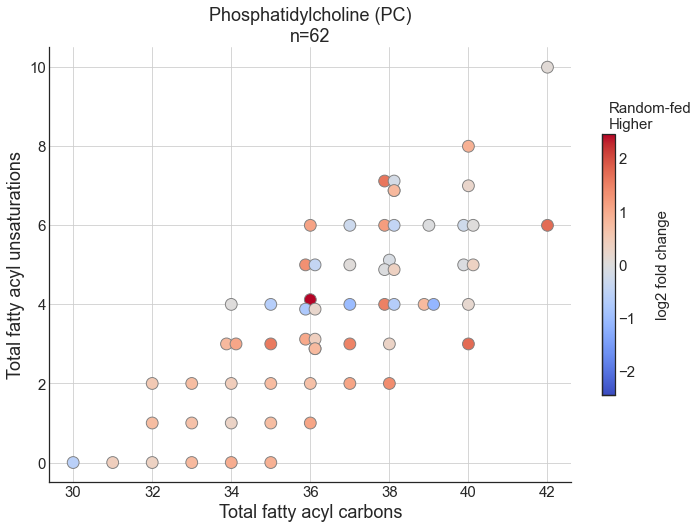

In [377]:
make_carbon_unsat_plot('PC', 0.12)
num = ids.loc[ids['molec_class'] == 'PC'].shape[0]
plt.title(f'Phosphatidylcholine (PC)\nn={num}', fontsize=18)

plt.savefig(r'..\reports\figures\4-5-4\PC_log2fc.png', dpi=150, bbox_inches='tight')
plt.savefig(r'..\reports\figures\4-5-4\PC_log2fc.svg', dpi=150, bbox_inches='tight')

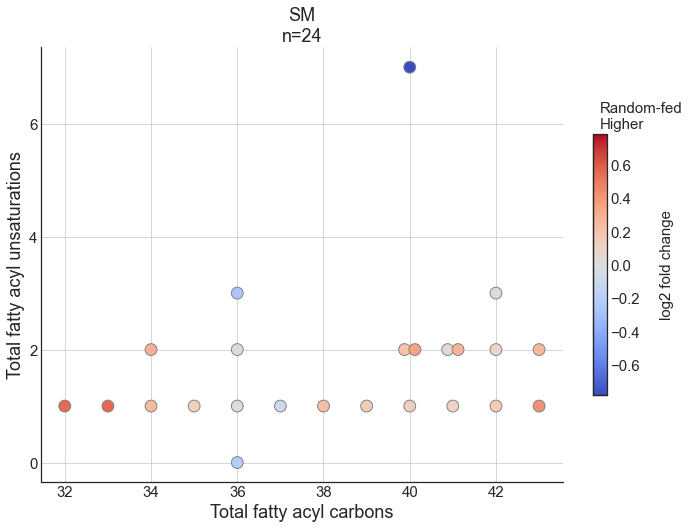

In [378]:
make_carbon_unsat_plot('SM', 0.12)

num = ids.loc[ids['molec_class'] == 'SM'].shape[0]
plt.title(f'SM\nn={num}', fontsize=18)

plt.savefig(r'..\reports\figures\4-5-4\SM_log2fc.png', dpi=150, bbox_inches='tight')
plt.savefig(r'..\reports\figures\4-5-4\SM_log2fc.svg', dpi=150, bbox_inches='tight')

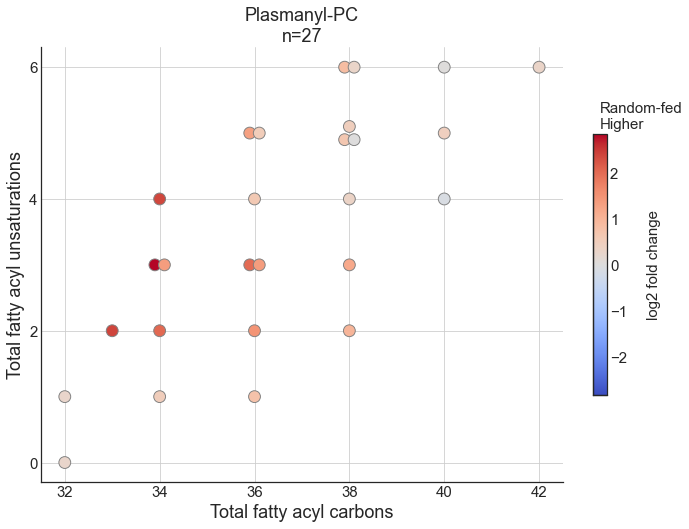

In [379]:
lipid_class = 'Plasmanyl-PC'

make_carbon_unsat_plot(lipid_class, 0.1)

num = ids.loc[ids['molec_class'] == lipid_class].shape[0]
plt.title(f'{lipid_class}\nn={num}', fontsize=18)

plt.savefig(r'..\reports\figures\4-5-4\PlasmanylPC_log2fc.png', dpi=150, bbox_inches='tight')
plt.savefig(r'..\reports\figures\4-5-4\PlasmanylPC_log2fc.svg', dpi=150, bbox_inches='tight')

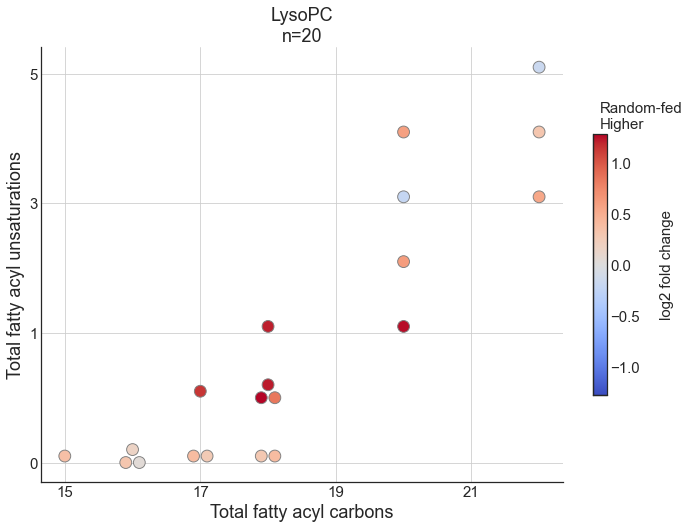

In [380]:
lipid_class = 'LysoPC'

make_carbon_unsat_plot(lipid_class, 0.1)

num = ids.loc[ids['molec_class'] == lipid_class].shape[0]
plt.title(f'{lipid_class}\nn={num}', fontsize=18)

plt.savefig(r'..\reports\figures\4-5-4\LysoPC_log2fc.png', dpi=150, bbox_inches='tight')
plt.savefig(r'..\reports\figures\4-5-4\LysoPC_log2fc.svg', dpi=150, bbox_inches='tight')

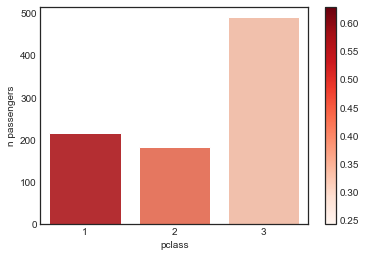

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns
titanic = sns.load_dataset("titanic")
g = titanic.groupby('pclass')
survival_rates = g['survived'].mean()
n = g.size()
norm = plt.Normalize(survival_rates.min(), survival_rates.max())
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
sm.set_array([])
ax = sns.barplot(x=n.index, y=n, hue=survival_rates, palette='Reds', dodge=False)
ax.set_ylabel('n passengers')
ax.get_legend().remove()
ax.figure.colorbar(sm)

In [ ]:
# for i, cls in enumerate(['TG','PC','LysoPC', 'PI', 
#             'PE',  'SM',
#             'Plasmanyl-PC', 'Plasmenyl-PC', 'Plasmanyl-PE', 'Plasmenyl-PE']):

fig, axs = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(11, 8)
# lipid_classes = ['TG', 'PC', 'SM', 'Plasmanyl-PC']
lipid_classes = ['TG']
for i, cls in enumerate(lipid_classes):
#     ax_row, ax_col = divmod(i, 2)
#     ax = axs[ax_row][ax_col]
    ax = axs
#     df = ids.loc[(data['molec_class'] == cls) & (data['qval_sampling:ogtt'] < 0.1)]
    df = tgdf
    max_C, min_C = df['fa_carbons'].max(), df['fa_carbons'].min()
    max_unsat, min_unsat = df['fa_unsat'].max(), df['fa_unsat'].min()
    C_unsat_combos = set(ids.loc[data['molec_class'] == cls].value_counts(['fa_carbons', 'fa_unsat']).index)
    sns.scatterplot(
        data=df, x='fa_carbons', y='fa_unsat',
#         size='-log10 p-value', sizes=(10, 200),
#         size='pval_asterisks', sizes={'ns': 20, '*': 55, '**': 75, '***': 110, '****': 120},
        s=100,
#         style='pval_asterisks', markers={'ns': '^','*':'o'},
        hue='log2 FC', 
        hue_norm=TwoSlopeNorm(vcenter=0.0, vmin=df['log2 FC'].min(), vmax=df['log2 FC'].max()), 
        palette='coolwarm',  # GnBu  viridis_r
        legend=('brief' if i == 0 else False),
        edgecolor='gray',        
        ax=ax
    )
    ax.set_title(f'{cls}  n={len(df)}', fontsize=17)
    ax.set_xticks(np.arange(min_C, max_C+1, 2))
    ax.set_xticklabels([int(x) for x in np.arange(min_C, max_C+1, 2)], fontsize=15)
    ax.set_yticks(np.arange(min_unsat, max_unsat+1, 2))
    ax.set_yticklabels([int(x) for x in np.arange(min_unsat, max_unsat+1, 2)], fontsize=15)
    ax.grid(alpha=0.45)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
#     ax.set_background('gray')
#     if i == 1:
#         ax.legend(loc=(1.12, -1), markerscale=1.7, fontsize=16)
# fig.legend(loc=('lower right'), bbox_to_anchor=(1.22, 0.1), markerscale=1.2, fontsize=18)
# plt.legend(loc=(1.02, 0.2))
ax.legend(title='log2 fold change', loc=(1.01, 0.5), markerscale=1.5, fontsize=15, title_fontsize=18)

fig.suptitle('Lipids by class significant under glucose tolerance', fontsize=18)
fig.supylabel('Total fatty acyl unsaturations', fontsize=18)
fig.supxlabel('Total fatty acyl carbons', fontsize=18)
fig.set_facecolor('white')
# plt.grid()
plt.tight_layout()
sns.despine()
# plt.savefig(r'..\reports\figures\4-5-4\TG_.png', bbox_inches='tight')

In [69]:
ids.loc[data['Compound Class'] == 'TG'].value_counts(['fa_carbons', 'fa_unsat']).iloc[0:30]

fa_carbons  fa_unsat
54          4           3
58          9           3
60          11          3
58          7           3
            11          3
54          5           2
56          4           2
52          6           2
            5           2
            4           2
56          6           2
            8           2
54          7           2
58          6           2
            8           2
54          6           2
58          10          2
62          13          2
60          12          2
64          17          1
54          8           1
55          2           1
            3           1
            4           1
            8           1
56          1           1
            2           1
            3           1
62          14          1
56          5           1
dtype: int64

In [58]:
set(ids.loc[data['Compound Class'] == 'TG'].value_counts(['fa_carbons', 'fa_unsat']).index)

{(46, 0),
 (46, 1),
 (46, 2),
 (46, 3),
 (47, 0),
 (48, 0),
 (48, 1),
 (48, 2),
 (48, 3),
 (49, 0),
 (49, 1),
 (49, 2),
 (49, 3),
 (50, 0),
 (50, 1),
 (50, 2),
 (50, 3),
 (50, 4),
 (50, 5),
 (51, 1),
 (51, 2),
 (51, 3),
 (51, 4),
 (51, 5),
 (52, 0),
 (52, 1),
 (52, 2),
 (52, 3),
 (52, 4),
 (52, 5),
 (52, 6),
 (53, 1),
 (53, 2),
 (53, 3),
 (53, 4),
 (53, 5),
 (54, 0),
 (54, 1),
 (54, 2),
 (54, 3),
 (54, 4),
 (54, 5),
 (54, 6),
 (54, 7),
 (54, 8),
 (55, 2),
 (55, 3),
 (55, 4),
 (55, 8),
 (56, 1),
 (56, 2),
 (56, 3),
 (56, 4),
 (56, 5),
 (56, 6),
 (56, 7),
 (56, 8),
 (56, 9),
 (57, 2),
 (57, 8),
 (58, 2),
 (58, 3),
 (58, 4),
 (58, 6),
 (58, 7),
 (58, 8),
 (58, 9),
 (58, 10),
 (58, 11),
 (58, 12),
 (59, 3),
 (60, 3),
 (60, 4),
 (60, 10),
 (60, 11),
 (60, 12),
 (60, 13),
 (62, 13),
 (62, 14),
 (64, 17),
 (66, 18)}

<AxesSubplot:xlabel='fa_carbons', ylabel='fa_unsat'>

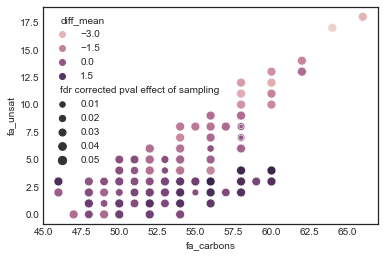

In [29]:
sns.scatterplot(data=ids.loc[ids['Compound Class'] == 'TG'], x='fa_carbons', y='fa_unsat', 
                size=q_samp, sizes=(80, 20),
                hue='diff_mean')

In [ ]:
np.arange()

<AxesSubplot:>

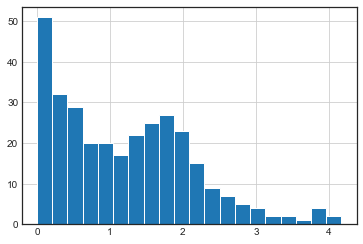

In [74]:
ids['-log10 p-value'].hist(bins=20)

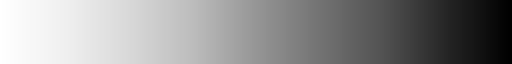

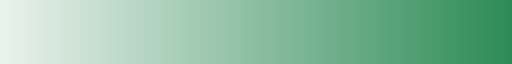

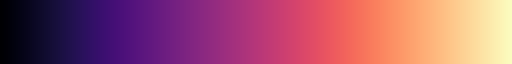

In [77]:
display(sns.color_palette('Greys', as_cmap=True))
display(sns.light_palette('seagreen', as_cmap=True))
display(sns.color_palette('magma', as_cmap=True))